In [107]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy as sm
%matplotlib inline

In [108]:
ramen = pd.read_csv('ramen-ratings.csv')

In [109]:
ramen.head()

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2580,New Touch,T's Restaurant Tantanmen,Cup,Japan,3.75,NaN
1,2579,Just Way,Noodles Spicy Hot Sesame Spicy Hot Sesame Guan...,Pack,Taiwan,1,NaN
2,2578,Nissin,Cup Noodles Chicken Vegetable,Cup,USA,2.25,NaN
3,2577,Wei Lih,GGE Ramen Snack Tomato Flavor,Pack,Taiwan,2.75,NaN
4,2576,Ching's Secret,Singapore Curry,Pack,India,3.75,NaN


In [110]:
ramen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2580 entries, 0 to 2579
Data columns (total 7 columns):
Review #    2580 non-null int64
Brand       2580 non-null object
Variety     2580 non-null object
Style       2578 non-null object
Country     2580 non-null object
Stars       2580 non-null object
Top Ten     41 non-null object
dtypes: int64(1), object(6)
memory usage: 141.2+ KB


Review #: ID for the review. Not necessary.

Brand: Brand of ramen. Worth looking into to see if some brands rate better than others.

Variety: Explanation of what kind of ramen it is. Needs to be parsed.

Style: Style of ramen. Needs to be categorized.

Country: Country of origin of the ramen. Needs to be categorized.

Stars: Rating of ramen, our target variable. Needs to be changed into a numeric column.

Top Ten: Only 41 entries. Will be dropped.


In [111]:
total = ramen.isnull().sum().sort_values(ascending=False)
perc = (ramen.isnull().sum()/ramen.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, perc], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Top Ten,2539,0.984109
Style,2,0.000775
Stars,0,0.000000
Country,0,0.000000
Variety,0,0.000000
Brand,0,0.000000
Review #,0,0.000000


Will drop Top Ten and the 2 rows where Style is missing an entry

In [112]:
ramen.drop('Top Ten', axis=1, inplace=True)
ramen = ramen.drop(ramen[ramen['Style'].isnull()].index)

While trying to convert Stars into a numeric column we find that there is an entry 'Unrated' in the column for entries without ratings.

We will be dropping these rows as there are few of them and it is our target variable.

In [113]:
ramen[ramen['Stars'] == 'Unrated']

,Review #,Brand,Variety,Style,Country,Stars
32,2548,Ottogi,Plain Instant Noodle No Soup Included,Pack,South Korea,Unrated
122,2458,Samyang Foods,Sari Ramen,Pack,South Korea,Unrated
993,1587,Mi E-Zee,Plain Noodles,Pack,Malaysia,Unrated


In [114]:
ramen = ramen.drop(ramen[ramen['Stars'] == 'Unrated'].index)

In [115]:
ramen['Stars'] = pd.to_numeric(ramen['Stars'])

In [116]:
ramen.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2575 entries, 0 to 2579
Data columns (total 6 columns):
Review #    2575 non-null int64
Brand       2575 non-null object
Variety     2575 non-null object
Style       2575 non-null object
Country     2575 non-null object
Stars       2575 non-null float64
dtypes: float64(1), int64(1), object(4)
memory usage: 140.8+ KB


In [117]:
ramen['Style'].unique()

array(['Cup', 'Pack', 'Tray', 'Bowl', 'Box', 'Can', 'Bar'], dtype=object)

Text(0, 0.5, 'Rating')

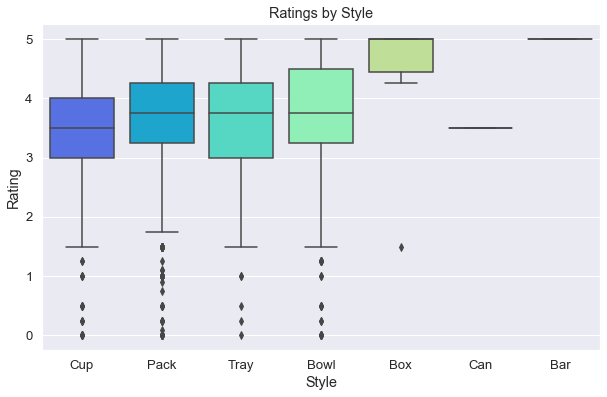

In [118]:
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set(font_scale=1.2)

fig, ax = plt.subplots()
fig.set_size_inches(10,6)
ax.set_title('Ratings by Style')
ax.set_yticks(range(0, 6))

sns.boxplot(x='Style', y='Stars', data=ramen, palette='rainbow', ax=ax)
#sns.swarmplot(x='Style', y='Stars', data=ramen, ax=ax, color='black')
ax.set_ylabel('Rating')

In [119]:
ramen[ramen['Stars'] == 5]['Stars'].count()

386

In [120]:
ramen['Stars'].value_counts()

4.000    393
5.000    386
3.750    349
3.500    335
3.000    175
3.250    170
4.250    143
4.500    135
2.750     85
2.000     68
2.500     67
4.750     64
1.500     37
1.750     27
1.000     26
0.000     26
2.250     21
0.500     14
0.250     11
1.250     10
4.300      4
3.800      3
2.900      2
2.800      2
3.100      2
2.300      2
1.100      2
4.125      2
3.650      1
3.600      1
3.700      1
3.400      1
3.125      1
2.850      1
0.100      1
1.800      1
3.200      1
2.100      1
3.300      1
2.125      1
0.750      1
0.900      1
Name: Stars, dtype: int64

In [121]:
count = ramen['Stars'].value_counts()
percent = (ramen['Stars'].value_counts())/(ramen['Stars'].count())
table = pd.concat([count, percent], axis=1, keys=['Count', 'Percent'])
table.head()

,Count,Percent
4.00,393,0.152621
5.00,386,0.149903
3.75,349,0.135534
3.50,335,0.130097
3.00,175,0.067961


Looking at the table of the specific ratings, theres not that many unique values of ratings given that there are 2000+ ratings in total.

In [122]:
ramen['Country'].unique()

array(['Japan', 'Taiwan', 'USA', 'India', 'South Korea', 'Singapore',
       'Thailand', 'Hong Kong', 'Vietnam', 'Ghana', 'Malaysia',
       'Indonesia', 'China', 'Nigeria', 'Germany', 'Hungary', 'Mexico',
       'Fiji', 'Australia', 'Pakistan', 'Bangladesh', 'Canada', 'Nepal',
       'Brazil', 'UK', 'Myanmar', 'Netherlands', 'United States',
       'Cambodia', 'Finland', 'Sarawak', 'Philippines', 'Sweden',
       'Colombia', 'Estonia', 'Holland', 'Poland', 'Dubai'], dtype=object)

In [123]:
ramen.dtypes

Review #      int64
Brand        object
Variety      object
Style        object
Country      object
Stars       float64
dtype: object

In [124]:
ramen.drop('Variety', axis=1, inplace=True)
ramen.drop('Review #', axis=1, inplace=True)
ramen.drop('Style')

In [125]:
ramen['Brand'] = pd.Categorical(ramen['Brand'])
ramen['Country'] = pd.Categorical(ramen['Country'])